Dataset Overview:
Number of samples: 1797
Number of features (pixels per image): 64
Classes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}



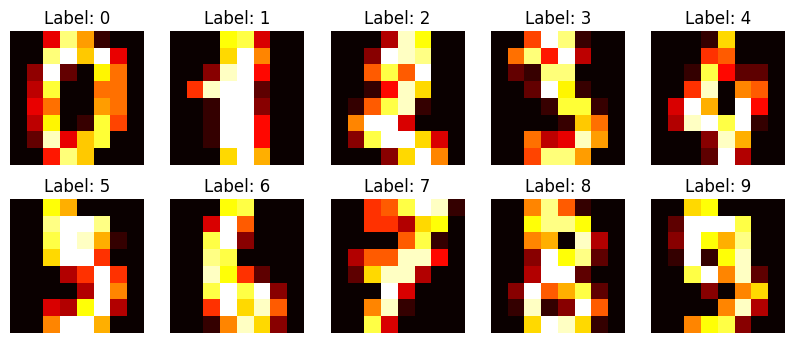

Best Hyperparameters: {'alpha': 5.0}
Best Cross-Validation Accuracy: 0.9045342439764751

Test Accuracy with Optimized Model: 0.8944444444444445

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.92      0.66      0.77        50
           2       0.85      0.94      0.89        47
           3       1.00      0.85      0.92        54
           4       0.94      1.00      0.97        60
           5       0.98      0.77      0.86        66
           6       0.98      0.96      0.97        53
           7       0.92      1.00      0.96        55
           8       0.72      0.95      0.82        43
           9       0.72      0.85      0.78        59

    accuracy                           0.89       540
   macro avg       0.90      0.90      0.89       540
weighted avg       0.91      0.89      0.89       540


Confusion Matrix:
 [[52  0  0  0  1  0  0  0  0  0]
 [ 0 33  7  0  0  0

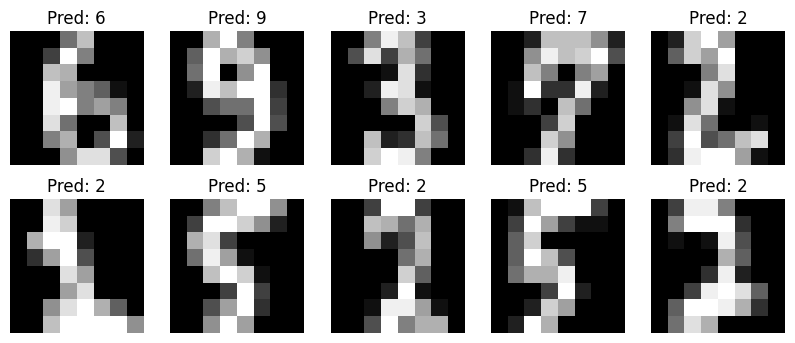

In [4]:
# Importing required libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Loading the Digits dataset
data = load_digits()
X = data.data  # Features (64 pixel values per image)
y = data.target  # Labels (digit classes 0-9)

# Displaying some sample digits with their actual labels
print("Dataset Overview:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features (pixels per image): {X.shape[1]}")
print(f"Classes: {set(y)}\n")

plt.figure(figsize=(10, 4))
for index, (image, label) in enumerate(zip(X[:10], y[:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image.reshape(8, 8), cmap="hot")
    plt.title(f"Label: {label}")
    plt.axis("off")
plt.show()

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining the model
model = MultinomialNB()

# Defining the hyperparameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

# Performing GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters and cross-validation score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Using the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluating the optimized model
accuracy = accuracy_score(y_test, y_pred)
print("\nTest Accuracy with Optimized Model:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Displaying some test samples with predicted labels
plt.figure(figsize=(10, 4))
for index, (image, label) in enumerate(zip(X_test[:10], y_pred[:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image.reshape(8, 8), cmap="gray")
    plt.title(f"Pred: {label}")
    plt.axis("off")
plt.show()
